# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Bank_Customer_retirement.csv")

In [3]:
#print the column names
print(data.keys())

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')


In [4]:
data.shape

(500, 4)

In [5]:
data.head(5)

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [6]:
data.tail(5)

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

<Figure size 720x720 with 0 Axes>

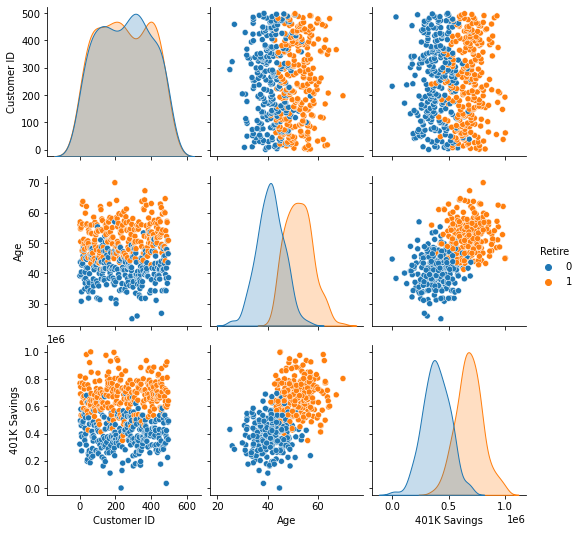

In [7]:
#Using pairplot to explore the relationships between features
plt.figure(figsize = (10,10))
sns.pairplot(data, hue = "Retire")

<AxesSubplot:xlabel='Retire', ylabel='count'>

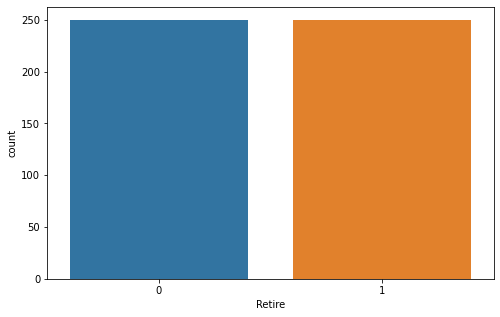

In [8]:
#Explore the distribution of retire and not retire 
plt.figure(figsize = (8,5))
sns.countplot(x = "Retire", data = data)

# STEP #4: MODEL TRAINING 

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [10]:

# Drop the target label coloumns
X = data.drop(["Retire","Customer ID"],axis = 1)
y = data["Retire"]

In [11]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [12]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
X_train.shape

(350, 2)

In [15]:
X_test.shape

(150, 2)

In [16]:
y_train.shape

(350,)

In [17]:
y_test.shape

(150,)

In [18]:
svc = SVC()

# STEP #5: EVALUATING THE MODEL

In [19]:
#Fit the model and predict the test data
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)


<AxesSubplot:>

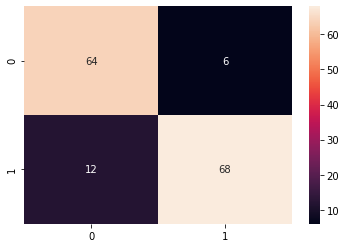

In [20]:
#Using the confusion matrix to evaluate the performance of the model
sns.heatmap(confusion_matrix(y_test,y_predict),annot = True)

In [21]:

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        70
           1       0.92      0.85      0.88        80

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



 The accuracy is 0.88, next try to normalize the data and use hyperparameter tunning to improve the model performance

# STEP #6: IMPROVING THE MODEL -- Normalize data

In [22]:
print(X_train.min())

Age             26.803434
401K Savings    10.000000
dtype: float64


In [23]:
print(X_train.max())

Age                  70.0
401K Savings    1000000.0
dtype: float64


In [24]:
# Normalization 
range_scaled = X_train.max() - X_train.min()
X_train_scaled = (X_train - X_train.min())/range_scaled

In [25]:
X_train_scaled

,Age,401K Savings
141,0.591663,0.430741
383,0.282970,0.301123
135,0.476033,0.519719
493,0.551959,0.612941
122,0.393097,0.355072
...,...,...
323,0.259142,0.354261
192,0.419276,0.996461
117,0.561351,0.563442
47,0.534463,0.425905


In [26]:
y_train

141    0
383    0
135    0
493    1
122    0
      ..
323    0
192    1
117    0
47     1
172    0
Name: Retire, Length: 350, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

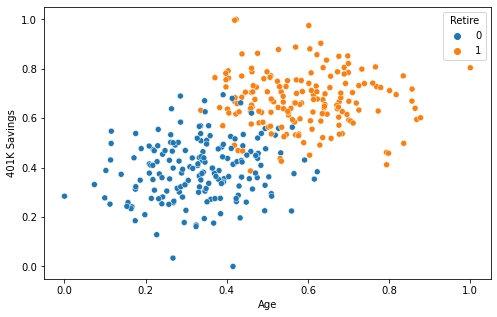

In [27]:
# Plot the data and normalized data to see whether they are in the same scale
#plot the normalized data
plt.figure(figsize = (8,5))
sns.scatterplot(data = X_train_scaled, x="Age", y = "401K Savings", hue = y_train)

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

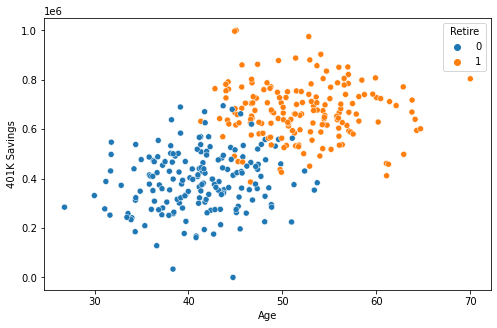

In [28]:
#Plot the original data
plt.figure(figsize = (8,5))
sns.scatterplot(data = X_train, x="Age", y = "401K Savings", hue = y_train)

In [29]:
#Normalize the test data
range_test_scaled = X_test.max() - X_test.min()
X_test_scaled = (X_test - X_test.min())/range_test_scaled

In [30]:
svc_scaled = SVC()

In [31]:
#Fit the model and predict the normalized data
svc_scaled.fit(X_train_scaled, y_train)
y_predict_scaled =  svc_scaled.predict(X_test_scaled)

<AxesSubplot:>

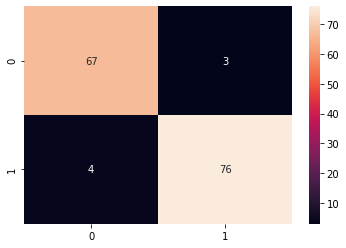

In [32]:
sns.heatmap(confusion_matrix(y_test,y_predict_scaled),annot = True)

In [33]:
print(classification_report(y_test,y_predict_scaled))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        70
           1       0.96      0.95      0.96        80

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



The accuracy is now 0.95, the performance is improved compared with the raw model which accuray is 0.88. Next, try to use GridSearchCV to do hyperparameter tunning.

# IMPROVING THE MODEL - PART 2: Hyperparater tunning

In [34]:
#set up the parameters
param_grid = {'C':[0.1,1,10,100],"gamma":[1,0.1,0.01,0.001],"kernel":['rbf']}

In [35]:
grid = GridSearchCV(SVC(), param_grid, verbose = 4, refit = True)

In [36]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [37]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [38]:
y_predict_grid = grid.predict(X_test_scaled)

<AxesSubplot:>

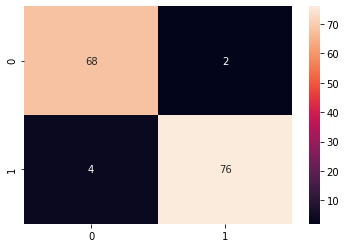

In [39]:
sns.heatmap(confusion_matrix(y_test,y_predict_grid), annot = True)

In [40]:
print(classification_report(y_test,y_predict_grid))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.97      0.95      0.96        80

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



The accuracy is now 0.96, and it is higher than the models above. We can also try to use different models such as Logistic Regression, Random Forest, etc to explore the performance.